In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
sns.set_palette('colorblind')

In [2]:
from generate_corpora import corpus_from_json
from analysis import *

In [3]:
models = ['grnn', 'gpt2']
constructions = ['cleft', 'intro_topic', 'nointro_topic', 'tough']
all_island_effects = []
all_island_surprisals = []
for model in models:
    for construction in constructions:
        control_filename =  os.path.join("grammar_outputs", "simple_cfgs", model, f"{construction}_grammar_c.json")
        island_filename =  os.path.join("grammar_outputs", "simple_cfgs", model, f"{construction}_grammar_i.json")
        control_tuples = corpus_from_json(control_filename, is_tuples = True)
        island_tuples = corpus_from_json(island_filename, is_tuples = True)
        all_island_effects += island_effects_for_model(model, control_tuples, island_tuples, construction)
        all_island_surprisals += island_surprisals("control", control_tuples, model, construction)
        all_island_surprisals += island_surprisals("island", island_tuples, model, construction)

grnn_cnp_control = corpus_from_json("grammar_outputs/wilcox_replication/island_cnp_obj_grnn.json", is_tuples = True)
grnn_cnp_island = corpus_from_json("grammar_outputs/wilcox_replication/island_cnp_that_grnn.json", is_tuples = True)
gpt2_cnp_control = corpus_from_json("grammar_outputs/wilcox_replication/island_cnp_obj_gpt2.json", is_tuples = True)
gpt2_cnp_island = corpus_from_json("grammar_outputs/wilcox_replication/island_cnp_that_gpt2.json", is_tuples = True)
grnn_cnp_island_effects = island_effects_for_model("grnn", grnn_cnp_control, grnn_cnp_island, "wh_movement")
gpt2_cnp_island_effects = island_effects_for_model("gpt2", gpt2_cnp_control, gpt2_cnp_island, "wh_movement")
# surprisals are in other notebook
island_effects = pd.DataFrame(all_island_effects + grnn_cnp_island_effects + gpt2_cnp_island_effects)
all_island_surprisals = pd.DataFrame(all_island_surprisals)

Text(0.5, 1.05, 'GPT2 Wh-Effects')

<Figure size 2400x1500 with 0 Axes>

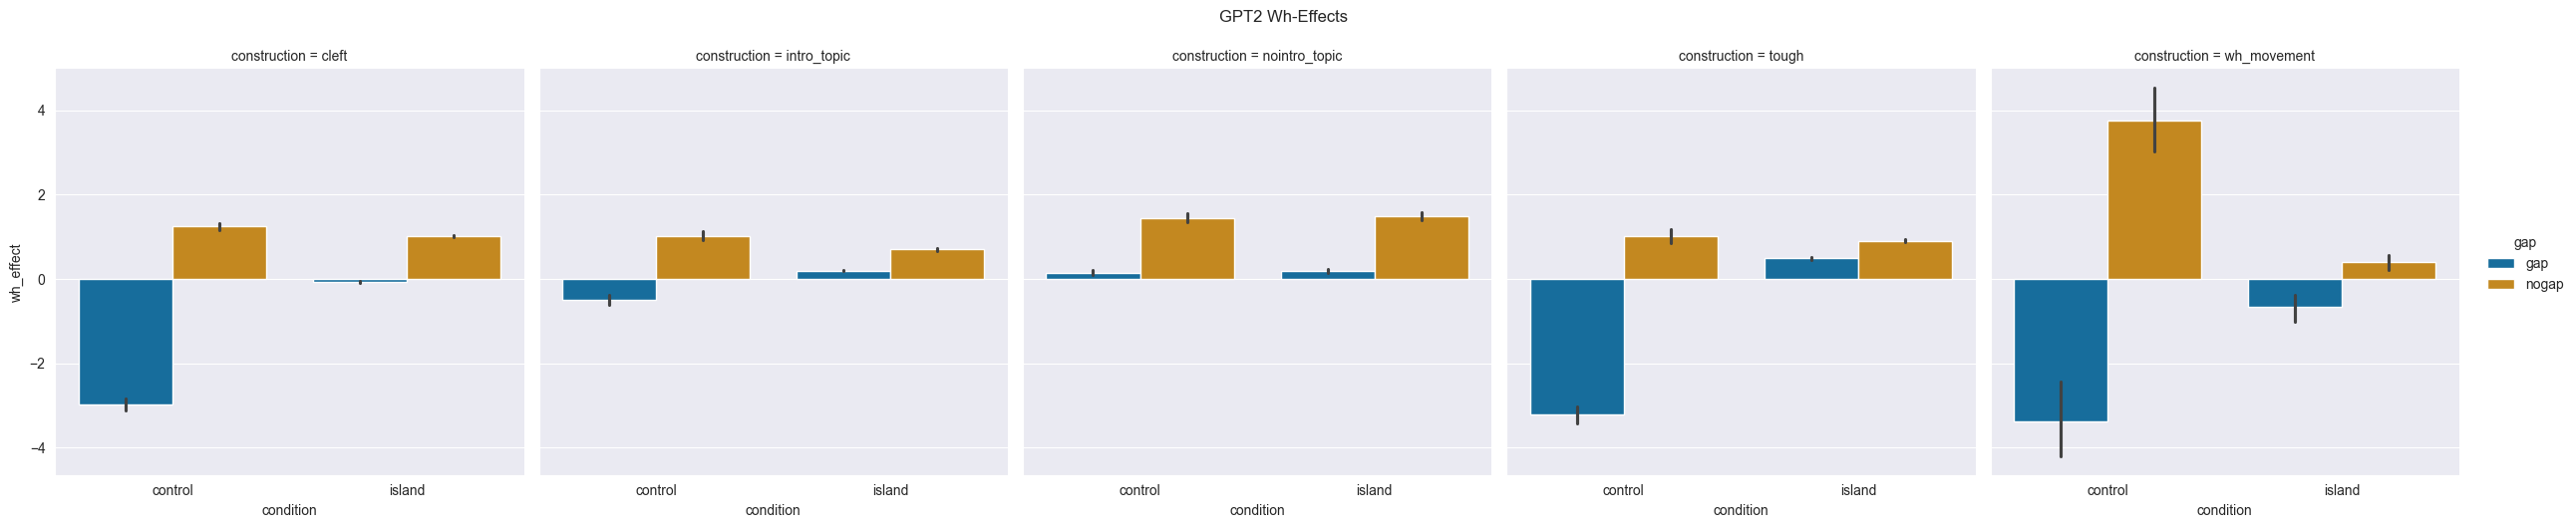

In [4]:
island_effects = pd.DataFrame(island_effects)
gpt2 = island_effects[island_effects['model'] == 'gpt2']
plt.figure(figsize=(24, 15))
sns.catplot(x="condition", y="wh_effect", hue="gap", data=gpt2, kind="bar", col = "construction",
            estimator="mean")
plt.suptitle("GPT2 Wh-Effects", y = 1.05)

Text(0.5, 1.05, 'GRNN Wh-Effects')

<Figure size 2400x1500 with 0 Axes>

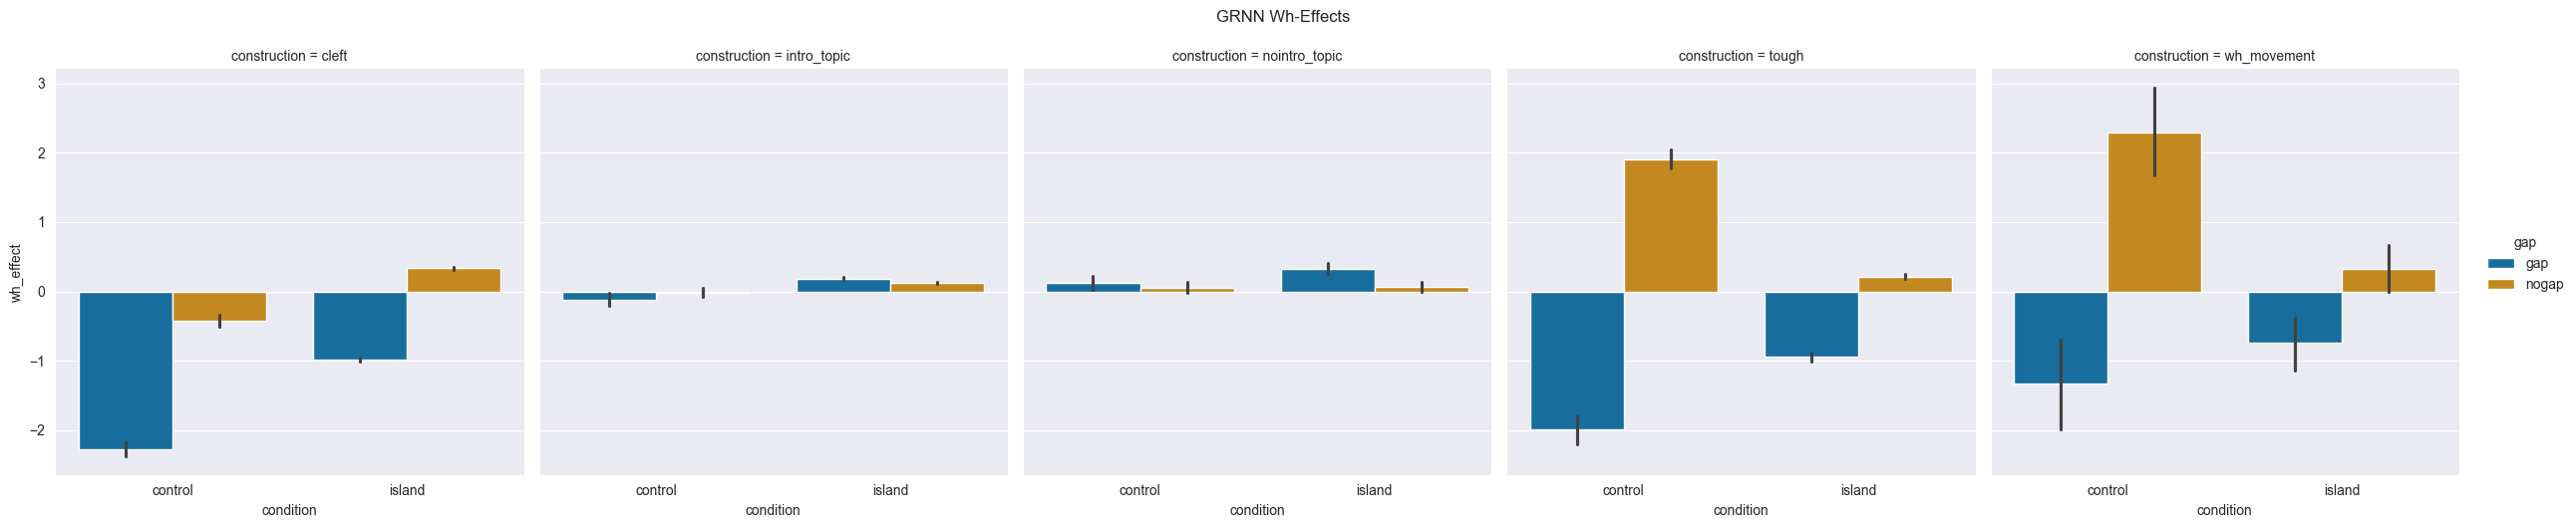

In [5]:
grnn = island_effects[island_effects['model'] == 'grnn']
plt.figure(figsize=(24, 15))
sns.catplot(x="condition", y="wh_effect", hue="gap", data=grnn, kind="bar", col = "construction",
            estimator="mean")
plt.suptitle("GRNN Wh-Effects", y = 1.05)

In [10]:
construction = "intro_topic"
control_filename =  os.path.join("grammar_outputs", "simple_cfgs", "grnn", f"{construction}_grammar_c.json")
island_filename =  os.path.join("grammar_outputs", "simple_cfgs", "grnn", f"{construction}_grammar_i.json")
    
control_tuples = corpus_from_json(control_filename, is_tuples = True)
island_tuples = corpus_from_json(island_filename, is_tuples = True)


In [12]:
island_formula = "surprisal~wh*gap*island+(gap||item)"
effects = interaction_effects(island_formula, constructions, models, all_island_surprisals)

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(gap||item)

Family: gaussian	 Inference: parametric

Number of observations: 19440	 Groups: {'item': 4374.0}

Log-likelihood: -36379.507 	 AIC: 72781.013

Random effects:

                 Name    Var    Std
item      (Intercept)  7.352  2.712
item.1            gap  3.480  1.866
Residual               0.671  0.819

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(gap||item)

Family: gaussian	 Inference: parametric

Number of observations: 19440	 Groups: {'item': 4374.0}

Log-likelihood: -36379.507 	 AIC: 72781.013

Random effects:

                 Name    Var    Std
item      (Intercept)  7.352  2.712
item.1            gap  3.480  1.866
Residual               0.671  0.819

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(gap||item)

Family: g

In [13]:
pd.DataFrame(effects)

,Estimate,P-val,Sig,model,condition
wh:gap:islandisland,0.532,0.000,***,grnn,cleft
wh:gap:islandisland,0.165,0.012,*,grnn,intro_topic
wh:gap:islandisland,0.194,0.015,*,grnn,nointro_topic
wh:gap:islandisland,2.736,0.000,***,grnn,tough
wh:gap:islandisland,3.128,0.000,***,gpt2,cleft
wh:gap:islandisland,1.017,0.000,***,gpt2,intro_topic
wh:gap:islandisland,-0.005,0.970,,gpt2,nointro_topic
wh:gap:islandisland,3.824,0.000,***,gpt2,tough


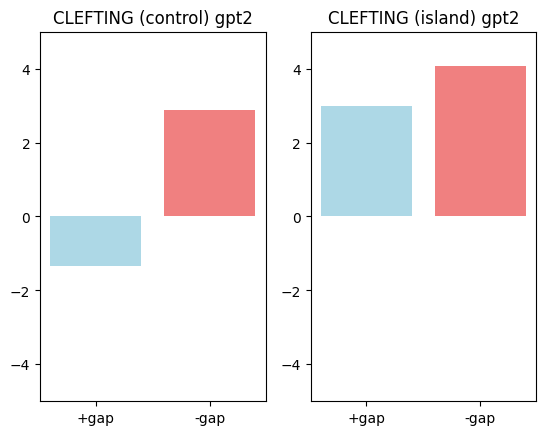

In [18]:
# clefting

# read data
# control
clefting_c_data = gc.corpus_from_json(f"grammar_outputs/simple_cfgs/{model}/cleft_grammar_c.json", True)
plus_gap_filler_effects_c = []
no_gap_filler_effects_c = []
for sentence_tuple in clefting_c_data:
    plus_gap_filler_effects_c.append(sentence_tuple.s_ab.critical_surprisal - sentence_tuple.s_ax.critical_surprisal)
    no_gap_filler_effects_c.append(sentence_tuple.s_xb.critical_surprisal - sentence_tuple.s_xx.critical_surprisal)
    
# island
clefting_i_data = gc.corpus_from_json(f"grammar_outputs/simple_cfgs/{model}/cleft_grammar_i.json", True)
plus_gap_filler_effects_i = []
no_gap_filler_effects_i = []
for sentence_tuple in clefting_i_data:
    plus_gap_filler_effects_i.append(sentence_tuple.s_ab.critical_surprisal - sentence_tuple.s_ax.critical_surprisal)
    no_gap_filler_effects_i.append(sentence_tuple.s_xb.critical_surprisal - sentence_tuple.s_xx.critical_surprisal)

# plot
# control
plt.subplot(1,2,1)
plt.bar(
    (
        f"+gap",
        f"-gap"
    ),
    (
        np.mean(plus_gap_filler_effects_c),
        np.mean(no_gap_filler_effects_c)
    ),
    color=['lightblue', 'lightcoral']
)
plt.ylim(-5, 5)
plt.title(f"CLEFTING (control) {model}")

# island
plt.subplot(1,2,2)
plt.bar(
    (
        f"+gap",
        f"-gap"
    ),
    (
        np.mean(plus_gap_filler_effects_i),
        np.mean(no_gap_filler_effects_i)
    ),
    color=['lightblue', 'lightcoral']
)
plt.ylim(-5, 5)
plt.title(f"CLEFTING (island) {model}")
plt.show()

In [ ]:
# topicalization w/ intro

In [ ]:
# topicalization w/out intro

In [ ]:
# tough movement